In [1]:
import pandas as pd

# Read data from CSV
df = pd.read_csv('sentiment_tweets.csv')

In [3]:
!pip install pandas textblob nltk matplotlib seaborn

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 245.8 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/626.3 kB 544.7 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [7]:
# Display the first few rows
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [9]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [15]:
# Display column names
print(df.columns)

Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')


In [17]:
!pip install pandas textblob seaborn matplotlib

In [19]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove @mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function
df['clean_message'] = df['message to examine'].apply(clean_text)

In [23]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['clean_message'].apply(get_sentiment)

In [25]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

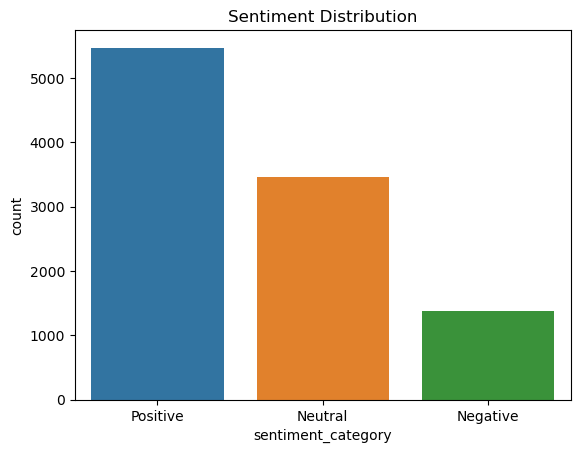

In [27]:
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution')
plt.show()

Visualize Sentiment Scores:

C:\Users\dimpl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


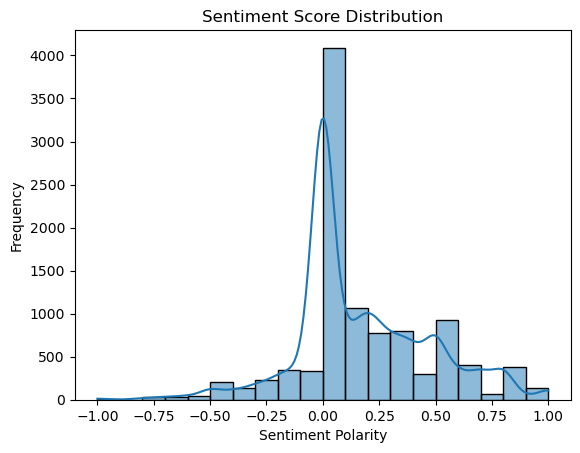

In [29]:
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(df.columns)

Index(['Index', 'message to examine', 'label (depression result)',
       'clean_message', 'sentiment', 'sentiment_category'],
      dtype='object')


In [33]:
# Display the first few rows of new dataset
df.head()

,Index,message to examine,label (depression result),clean_message,sentiment,sentiment_category
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss him...,0.600000,Positive
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,0.000000,Neutral
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,,0.000000,Neutral
3,288,@lapcat Need to send 'em to my accountant tomo...,0,Need to send em to my accountant tomorrow Odd...,0.041667,Positive
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspacecomLookThunder,0.000000,Neutral


In [35]:
# Save DataFrame to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)

## Sentiment Category Count

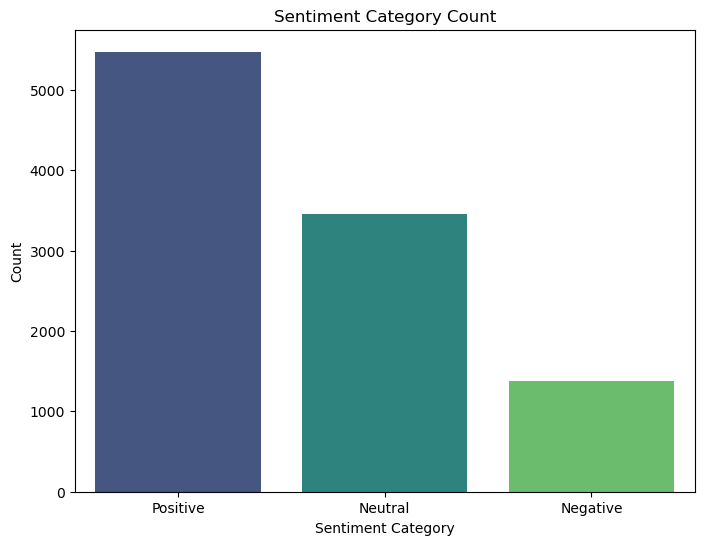

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment Category Count')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

## Sentiment Polarity Distribution

C:\Users\dimpl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


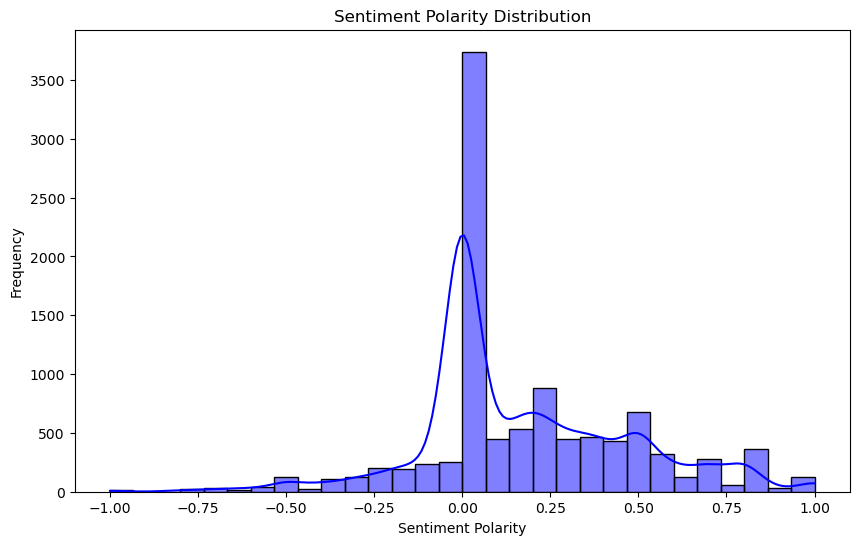

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## Sentiment Boxplot

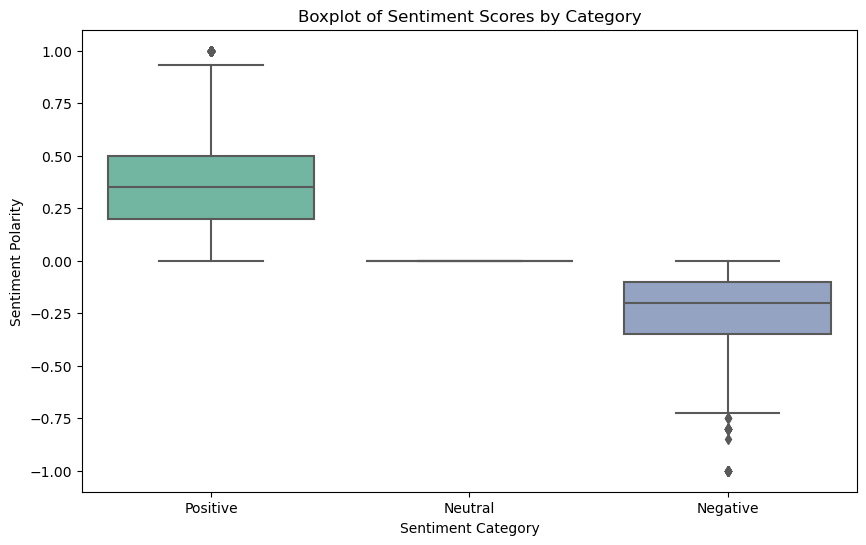

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='sentiment', data=df, palette='Set2')
plt.title('Boxplot of Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()

In [43]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


## Generate Word Cloud:

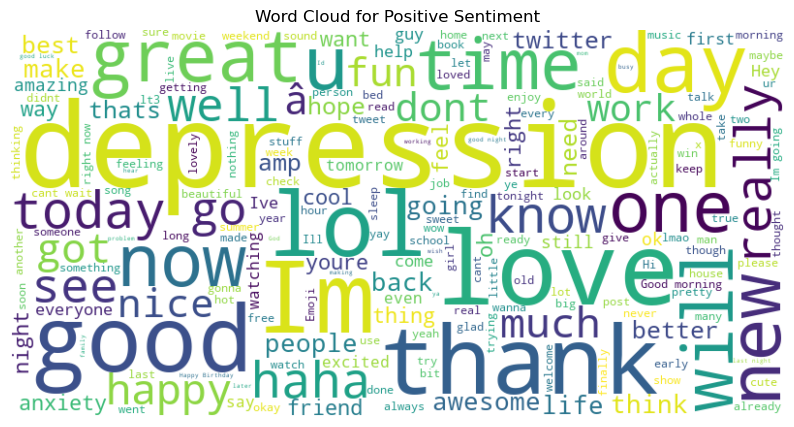

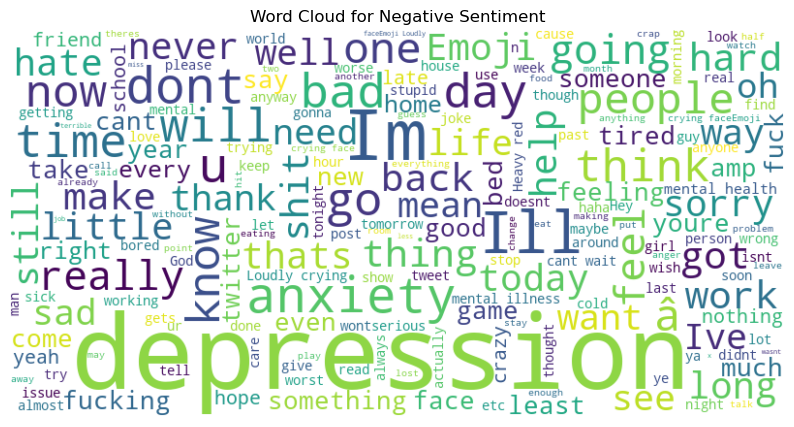

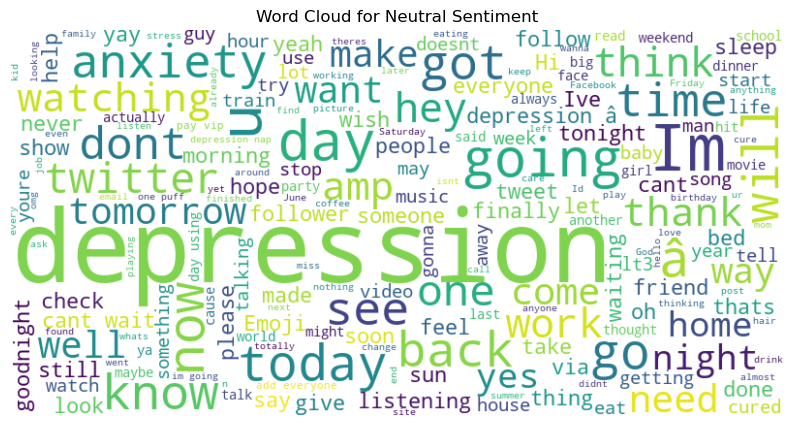

In [45]:
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Word cloud for positive sentiment
positive_messages = df[df['sentiment_category'] == 'Positive']['clean_message']
plot_wordcloud(positive_messages, 'Word Cloud for Positive Sentiment')

# Word cloud for negative sentiment
negative_messages = df[df['sentiment_category'] == 'Negative']['clean_message']
plot_wordcloud(negative_messages, 'Word Cloud for Negative Sentiment')

# Word cloud for neutral sentiment
neutral_messages = df[df['sentiment_category'] == 'Neutral']['clean_message']
plot_wordcloud(neutral_messages, 'Word Cloud for Neutral Sentiment')

## Violin Plot for Sentiment Scores

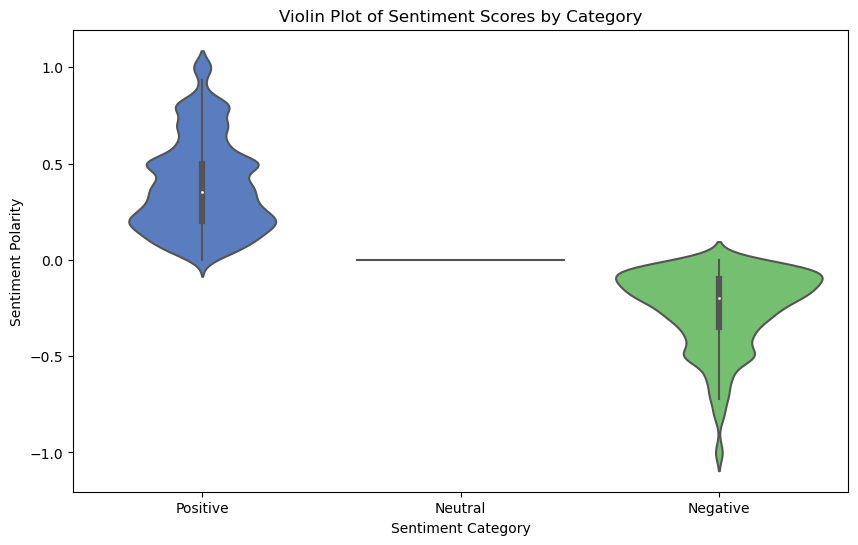

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_category', y='sentiment', data=df, palette='muted')
plt.title('Violin Plot of Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()